In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Retirer 'Love grows' car la ligne est corrompue et modifie le type de plusieurs variables dans tableau

In [33]:
spot=pd.read_csv('spotify-2023.csv', encoding='ANSI')
spot.info()
n=len(spot.index)
print(n)

print(spot.shape)
spot.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,"6,808",7,0,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,125,"1,800",0,NaN,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,"3,595",6,NaN,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,843,4,69,90,D,Major,76,91,50,54,0,7,5
5,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,"3,631",0,26,104,C#,Major,77,36,63,1,0,36,5
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,798,31,0,170,C#,Major,59,48,76,4,0,10,5
7,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,121,"2,969",10,31,125,A#,Minor,77,74,78,4,0,23,11
8,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,159,"2,179",0,44,95,G#,Major,75,64,52,41,0,11,3
9,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,137,"2,445",1,140,186,G,Major,68,49,59,16,0,13,28


In [34]:
spot['in_deezer_playlists']=spot['in_deezer_playlists'].map(lambda spot:spot.replace(',','')) 
spot=spot.astype({'in_deezer_playlists': 'int64'}) #on passe toutes la valeurs numériques en int64
spot['mode']=spot['mode'].replace({'Major': True, 'Minor': False}) #convertit les string 'Major' et 'Minor' en boolean true/false pour correlation
spot.info()
spot.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int64 
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,3421,20,NaN,171,C#,True,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,6808,7,0,96,C#,False,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,125,1800,0,NaN,110,C#,True,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,3595,6,NaN,98,F#,False,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,843,4,69,90,D,True,76,91,50,54,0,7,5
5,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,3631,0,26,104,C#,True,77,36,63,1,0,36,5
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,798,31,0,170,C#,True,59,48,76,4,0,10,5
7,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,121,2969,10,31,125,A#,False,77,74,78,4,0,23,11
8,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,159,2179,0,44,95,G#,True,75,64,52,41,0,11,3
9,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,137,2445,1,140,186,G,True,68,49,59,16,0,13,28


In [35]:
spot.value_counts('key')

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      74
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [36]:
spot['key']=spot['key'].replace({'C#': 1, 'G': 2, 'G#': 3, 'F': 4, 'B': 5, 'D' :6, 'A': 7, 'F#' : 8, 'E': 9, 'A#' : 10, 'D#' : 11 })


In [37]:
spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    object 
 14  bpm                   952 non-null    int64  
 15  key                   8

# analysis

## same nb of streams every season or is there a more poupular season ?
## if there is a season less popular than other, how to boost it up ?

## success playlists vs charts vs streams
## success vs nb of available platforms
## mode depending on season etc
## intégrer le succès sur les différentes plateformes
# prediction

## Predict type of music (genre, %dance, % accoustic etc) according to season of the year
## What type of artist is more likely to have success based on season ? (solo, duo, band ?)
## When to schedule artist tour ? (find other database to analyse the popularity peak after a record (single/album) is released ?
# music archetype depending on season, predict 
## mode, key, bpm, %voice etc

In [38]:

spotna=spot.isna().sum()
spotna
#print(spot.shape)


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Avant de convertir strams en integer, il y vaait des NA dans shazam et key, mais plus maintenant ?! 
Compliqué de retirer les NA car 95 NA dans key, ça fait 10% du jeu de données en moins

In [39]:
spot.value_counts('released_year')

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2013     13
2014     13
2015     11
2018     10
2011     10
2012     10
2010      7
2002      6
1999      5
2004      4
2000      4
1984      4
1963      3
1958      3
1957      2
1986      2
1985      2
1995      2
1982      2
2008      2
1975      2
1959      2
2003      2
1991      2
2005      1
2007      1
1930      1
1998      1
1997      1
1942      1
1994      1
1992      1
1987      1
1983      1
1979      1
1973      1
1971      1
1970      1
1968      1
1952      1
1950      1
1946      1
1996      1
Name: count, dtype: int64

In [40]:
print(spot['in_spotify_charts'].value_counts())
top10 = spot.sort_values('in_spotify_charts')
top10.head(450)

in_spotify_charts
0      404
4       48
2       42
6       36
3       18
5       17
8       17
1       16
13      16
12      16
10      15
9       15
16      14
14      13
7       12
34      12
17      11
15      10
11       9
26       9
19       9
30       9
38       8
20       8
18       7
21       7
24       7
36       7
23       7
35       6
44       6
25       6
43       6
33       6
28       5
27       5
22       5
32       5
40       4
50       4
31       4
39       4
42       4
53       3
77       3
29       3
52       3
46       3
59       3
56       2
48       2
41       2
47       2
69       2
45       2
80       2
37       2
78       2
83       2
55       2
61       2
58       1
87       1
101      1
113      1
147      1
66       1
91       1
79       1
63       1
130      1
68       1
98       1
76       1
49       1
62       1
100      1
88       1
115      1
110      1
64       1
104      1
Name: count, dtype: int64


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
475,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,21,11,40,0,0,146,NaN,True,69,63,45,48,0,18,4
479,It'll Be Okay,Shawn Mendes,1,2021,12,1,1950,0,287201015,56,8,104,0,10,78,2.0,True,40,7,29,62,0,9,3
468,It's Beginning to Look a Lot Like Christmas (w...,"Perry Como, The Fontane Sisters, Mitchell Ayre...",3,1958,1,1,6290,0,295998468,89,39,158,0,0,113,2.0,True,73,72,32,77,0,15,5
467,Lift Me Up - From Black Panther: Wakanda Forev...,Rihanna,1,2022,10,28,3311,0,297328960,129,31,212,1,41,177,7.0,True,25,17,30,90,0,13,3
465,Sweetest Pie,"Dua Lipa, Megan Thee Stallion",2,2022,3,11,3501,0,299634472,69,2,51,11,0,124,2.0,True,81,68,63,17,0,10,22
463,Where Did You Go?,"MNEK, Jax Jones",2,2022,1,26,4531,0,300983101,135,74,119,1,18,127,10.0,True,77,53,78,19,0,29,4
461,N95,Kendrick Lamar,1,2022,5,13,5542,0,301242089,52,16,65,0,206,140,11.0,False,81,39,66,38,0,12,14
460,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,0,18,0,24,166,1.0,True,70,57,57,9,20,11,7
459,Yet To Come,BTS,1,2022,6,10,829,0,302006641,32,110,26,0,0,172,1.0,True,56,68,89,4,0,33,19
825,Chance,Paulo Londra,1,2022,4,6,225,0,89566512,11,0,7,0,0,138,1.0,False,72,22,46,24,0,9,6


In [41]:
print(spot['in_spotify_charts'].value_counts())

in_spotify_charts
0      404
4       48
2       42
6       36
3       18
5       17
8       17
1       16
13      16
12      16
10      15
9       15
16      14
14      13
7       12
34      12
17      11
15      10
11       9
26       9
19       9
30       9
38       8
20       8
18       7
21       7
24       7
36       7
23       7
35       6
44       6
25       6
43       6
33       6
28       5
27       5
22       5
32       5
40       4
50       4
31       4
39       4
42       4
53       3
77       3
29       3
52       3
46       3
59       3
56       2
48       2
41       2
47       2
69       2
45       2
80       2
37       2
78       2
83       2
55       2
61       2
58       1
87       1
101      1
113      1
147      1
66       1
91       1
79       1
63       1
130      1
68       1
98       1
76       1
49       1
62       1
100      1
88       1
115      1
110      1
64       1
104      1
Name: count, dtype: int64


In [42]:
print(spot['artist(s)_name'].value_counts())

artist(s)_name
Taylor Swift                                                                                                                   34
The Weeknd                                                                                                                     22
SZA                                                                                                                            19
Bad Bunny                                                                                                                      19
Harry Styles                                                                                                                   17
Kendrick Lamar                                                                                                                 12
Morgan Wallen                                                                                                                  11
Ed Sheeran                                                                 

Donc spotify charts n'est pas super informatif car :
1- On a pas la chart pour 405 morceaux (codés 0)
2- On a pas la période pendant laquelle tel ou tel morceau était numéro 1, donc il ya 16 numéros 1. Toujours informatif mais moins que prévu.

In [43]:
topstr = spot.sort_values('streams', ascending=False)
topstr.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,3421,20,NaN,171,1.0,True,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,6808,7,0,96,1.0,False,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,125,1800,0,NaN,110,1.0,True,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,3595,6,NaN,98,8.0,False,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,843,4,69,90,6.0,True,76,91,50,54,0,7,5
5,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,3631,0,26,104,1.0,True,77,36,63,1,0,36,5
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,798,31,0,170,1.0,True,59,48,76,4,0,10,5
7,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,121,2969,10,31,125,10.0,False,77,74,78,4,0,23,11
8,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,159,2179,0,44,95,3.0,True,75,64,52,41,0,11,3
9,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,137,2445,1,140,186,2.0,True,68,49,59,16,0,13,28


In [44]:
spot_red=spot.drop(['track_name','artist(s)_name','mode','in_deezer_playlists','released_month','released_day','in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'key', 'in_shazam_charts'], axis=1)
spot_red.head(10)

,artist_count,released_year,in_spotify_playlists,streams,in_apple_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,1,2019,43899,3703895074,672,171,50,38,80,0,0,9,7
1,1,2017,32181,3562543890,33,96,83,93,65,58,0,9,8
2,1,2018,17836,2887241814,440,110,50,45,41,75,0,11,3
3,1,2019,24529,2864791672,533,98,82,54,59,69,0,18,10
4,2,2018,24094,2808096550,372,90,76,91,50,54,0,7,5
5,3,2016,43257,2713922350,433,104,77,36,63,1,0,36,5
6,2,2021,17050,2665343922,492,170,59,48,76,4,0,10,5
7,1,2017,18986,2594040133,250,125,77,74,78,4,0,23,11
8,2,2016,28032,2591224264,315,95,75,64,52,41,0,11,3
9,2,2016,29536,2565529693,281,186,68,49,59,16,0,13,28


In [45]:
spot_red.corr()

,artist_count,released_year,in_spotify_playlists,streams,in_apple_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.085614,-0.102184,-0.136463,-0.051487,-0.038680,0.206543,0.128712,0.137317,-0.101619,-0.050359,0.042681,0.119486
released_year,0.085614,1.000000,-0.397519,-0.230803,-0.203799,-0.007448,0.184904,-0.055354,0.097502,-0.129000,-0.015575,-0.006285,0.131884
in_spotify_playlists,-0.102184,-0.397519,1.000000,0.789822,0.708258,-0.019739,-0.106885,-0.021585,0.033899,-0.064683,-0.028194,-0.046725,-0.089973
streams,-0.136463,-0.230803,0.789822,1.000000,0.772063,-0.002438,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333
in_apple_playlists,-0.051487,-0.203799,0.708258,0.772063,1.000000,0.023450,-0.025945,0.057749,0.052807,-0.062299,-0.057349,-0.049662,-0.108515
bpm,-0.038680,-0.007448,-0.019739,-0.002438,0.023450,1.000000,-0.147630,0.041693,0.025932,-0.018065,-0.001283,-0.000803,0.038937
danceability_%,0.206543,0.184904,-0.106885,-0.105457,-0.025945,-0.147630,1.000000,0.409873,0.198485,-0.237128,-0.089371,-0.077665,0.184393
valence_%,0.128712,-0.055354,-0.021585,-0.040831,0.057749,0.041693,0.409873,1.000000,0.357516,-0.081161,-0.132765,0.021382,0.041874
energy_%,0.137317,0.097502,0.033899,-0.026051,0.052807,0.025932,0.198485,0.357516,1.000000,-0.577318,-0.038492,0.117334,-0.004632
acousticness_%,-0.101619,-0.129000,-0.064683,-0.004485,-0.062299,-0.018065,-0.237128,-0.081161,-0.577318,1.000000,0.042658,-0.050230,-0.023099


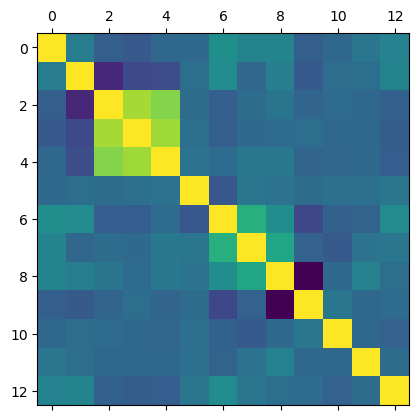

In [46]:
plt.matshow(spot_red.corr())


In [47]:
spot_int=spot.drop(['track_name','artist(s)_name','key', 'in_shazam_charts'],axis=1) #je retire toutes les valeurs non-numériques, sauf booléens (mode car on peut le convertir en 0 et 1) + shazan car j'arrive pas à convertir les NA, mais on peut trouver un moyen

In [48]:
spot_int['in_deezer_playlists']=spot_int['in_deezer_playlists'].map(lambda spot_int:spot_int.replace(',','')) #on retire toutes les , dans les valeurs de in_deezer_playlists


AttributeError: 'int' object has no attribute 'replace'

In [ ]:
spot_int=spot_int.astype({'in_deezer_playlists': 'int64'}) #on passe toutes la valeurs numériques en int64
spot_int['mode']=spot_int['mode'].replace({'Major': True, 'Minor': False}) #convertit les string 'Major' et 'Minor' en boolean true/false pour correlation
spot_int.info()
spot_int.head(10)

In [ ]:
spot_int.corr().style.background_gradient('coolwarm')


In [ ]:
spot_red=spot.drop(['track_name','artist(s)_name'],axis=1)
#spot_red=spot.drop(['in_shazam_charts', 'in_spotify_charts', 'in_deezer_charts', 'in_apple_charts', 'released_year', 'released_month', 'released_day'],axis=1)
spot_red.info()

In [ ]:
spot_red.corr().style.background_gradient('coolwarm')


In [ ]:
#spot_str_ply=spot[['streams', 'in_spotify_playlists','in_apple_playlists', 'in_deezer_playlists']]
#spot_str_ply.info()


## Début de la prédiction ici

In [ ]:
spot_str=spot[['streams', 'mode','bpm', 'danceability_%']]
spot_str['mode']=spot_str['mode'].replace({'Major': True, 'Minor': False})
spot_str.info()

In [ ]:
spot_str.head(5)

In [ ]:
features_list = ['mode', 'bpm', 'danceability_%']
X = spot_str.loc[:,features_list] #loc[:, features_list] [toutes les lignes, toutes les colonnes stockées dans la variable 'features_list']
y = spot_str.loc[:,'streams']   # [toutes les lignes, que la colonne streams]

In [ ]:
X_train.head(10)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, #combien on prend on test ici 20%
                                                    random_state=0) #modélisatoin de l'aléatoire
                                                    #stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set
                                                                # this makes sure we preserve the representativeness of total pop.


NameError: name 'X' is not defined

In [ ]:
numeric_features = [0, 1, 2] #on lui dit qu'on devra appliquer le standard scaler aux valeurs numériques du tableau, colonnes 0, 1 , 2 de X train
numeric_transformer = StandardScaler()

In [ ]:
featureencoder = ColumnTransformer(
    transformers=[  
        ('num', numeric_transformer, numeric_features)          # transformer numérique
        ]
    )

In [ ]:
X_train = featureencoder.fit_transform(X_train)
print(X_train[:5])

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !

In [ ]:
y_train_pred = regressor.predict(X_train)
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)

In [ ]:
## reproduce on test sample and assess perf

# Standardizing numeric features


X_test = featureencoder.transform(X_test)

print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)

In [ ]:
# Predictions on test set
y_test_pred = regressor.predict(X_test)
print(y_test_pred[:5])
print()

In [ ]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

In [ ]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

In [ ]:
X_train[:5]

In [ ]:
# Access transformers from feature_encoder
print("All transformers are: ", featureencoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", featureencoder.transformers_[0][1])

In [ ]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

In [ ]:
# Append all columns 
all_column_names = numerical_column_names
all_column_names

In [ ]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

## Predict stream avec dance, bpm et valence (car traduit positivité, un peu la meme idée qu'on avait avec mode)

In [ ]:
spot_str=spot[['streams', 'bpm', 'danceability_%', 'valence_%']]
spot_str.info()

In [ ]:
spot_str.head(5)

In [ ]:
features_list = ['bpm', 'danceability_%', 'valence_%']
X = spot_str.loc[:,features_list] #loc[:, features_list] [toutes les lignes, toutes les colonnes stockées dans la variable 'features_list']
y = spot_str.loc[:,'streams']   # [toutes les lignes, que la colonne streams]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, #combien on prend on test ici 20%
                                                    random_state=0) #modélisatoin de l'aléatoire
                                                    #, stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set
                                                                # this makes sure we preserve the representativeness of total pop.


In [ ]:
X_train.head(10)

In [ ]:
numeric_features = [0, 1, 2] #on lui dit qu'on devra appliquer le standard scaler aux valeurs numériques du tableau, colonnes 0, 1 , 2 de X train
numeric_transformer = StandardScaler()

In [ ]:
featureencoder = ColumnTransformer(
    transformers=[  
        ('num', numeric_transformer, numeric_features)          # transformer numérique
        ]
    )

In [ ]:
X_train = featureencoder.fit_transform(X_train)
print(X_train[:5])

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !

In [ ]:
y_train_pred = regressor.predict(X_train)
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)

In [ ]:
X_test = featureencoder.transform(X_test)

print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)

In [ ]:
y_test_pred = regressor.predict(X_test)
print(y_test_pred[:5])
print()

In [ ]:
#Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

In [ ]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

In [ ]:
# Access transformers from feature_encoder
print("All transformers are: ", featureencoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", featureencoder.transformers_[0][1])

In [ ]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

In [ ]:
# Append all columns 
all_column_names = numerical_column_names
all_column_names

In [ ]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

## Prediction de streams en fonction d'ajouts dans playlists de pluiseurs plateformes

In [ ]:
spot_str=spot[['streams', 'in_spotify_playlists','in_apple_playlists', 'in_deezer_playlists']]
spot_str.info()

In [ ]:
features_list = ['in_spotify_playlists','in_apple_playlists', 'in_deezer_playlists']
X = spot_str.loc[:,features_list] #loc[:, features_list] [toutes les lignes, toutes les colonnes stockées dans la variable 'features_list']
y = spot_str.loc[:,'streams']   # [toutes les lignes, que la colonne streams]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, #combien on prend on test ici 20%
                                                    random_state=0) #modélisatoin de l'aléatoire
                                                    #stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set
                                                                # this makes sure we preserve the representativeness of total pop.


In [ ]:
numeric_features = [0, 1, 2] #on lui dit qu'on devra appliquer le standard scaler aux valeurs numériques du tableau, colonnes 0, 1 , 2 de X train
numeric_transformer = StandardScaler()

In [ ]:
featureencoder = ColumnTransformer(
    transformers=[  
        ('num', numeric_transformer, numeric_features)          # transformer numérique
        ]
    )

In [ ]:
X_train = featureencoder.fit_transform(X_train)
print(X_train[:5])

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !

In [ ]:
y_train_pred = regressor.predict(X_train)
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)

In [ ]:
## reproduce on test sample and assess perf

# Standardizing numeric features


X_test = featureencoder.transform(X_test)

print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)

In [ ]:
# Predictions on test set
y_test_pred = regressor.predict(X_test)
print(y_test_pred[:5])
print()

In [ ]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

In [ ]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

In [ ]:
# Append all columns 
all_column_names = numerical_column_names
all_column_names

In [ ]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

## Classification de Key

In [ ]:
import pandas as pd
import sklearn 
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
spot_key=spot[['key', 'energy_%', 'instrumentalness_%', 'valence_%']]
spot_key.info()

In [ ]:
'''retirer toutes les lignes ou il ya des NA dans key'''
spot_k_n=spot_key.dropna(subset=['key'])
spot_k_n.value_counts()
spot_k_n.info()
spotna=spot_k_n.isna().sum()
spotna


In [ ]:
# Separate target variable Y from features X
## Choose the columns you want to have as your features
features_list = ['energy_%', 'instrumentalness_%', 'valence_%']

X = spot_k_n.loc[:,features_list] # We add feature_list into our loc 

y = spot_k_n.loc[:,'key'] # We set "Purchased" as the target variable

In [ ]:
## Choose the columns you want to have as your features
features_list = ['energy_%', 'instrumentalness_%', 'valence_%']

X = spot_k_n.loc[:,features_list] # We add feature_list into our loc 

y = spot_k_n.loc[:,'key'] # We set "Purchased" as the target variable

In [ ]:
label_encoder = LabelEncoder() 
y = label_encoder.fit_transform(y)
#y_train=y_train.replace({'C#': 1, 'G': 2, 'G#': 3, 'F': 4, 'B': 5, 'D' :6, 'A': 7, 'F#' : 8, 'E': 9, 'A#' : 10, 'D#' : 11 })
print(y)

In [ ]:

## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

                                        

In [ ]:
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [0, 1, 2] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

'''categorical_features = [0] # Choose which column index we are going to encode
categorical_transformer = OneHotEncoder(drop="first")'''

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        #('cat', categorical_transformer, categorical_features)   #### car pas de var categorique dans X
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)

print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)

In [ ]:
numeric_features = [0, 1, 2] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

#categorical_features = [0] # Choose which column index we are going to encode
categorical_transformer = OneHotEncoder(drop="first")

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        #('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)

print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)

In [ ]:
# on assigne le modele regression logistique
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train) # Fit model - revient à dire 'apprend'!

In [ ]:
y_train_pred = classifier.predict(X_train)

print("#### First five predictions on TRAIN set ####")
print(y_train_pred[0:5])

In [ ]:

# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test) # Ici on test le modèle, mais il faut pre-process X_test comme X_train plus haut, mais pas de fit sur le test donc juste transform


print("#### X_test AFTER preprocessing ####")
print(X_test[0:5,:])
print()

In [ ]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)

print("#### First five predictions on TEST set ####")
print(y_test_pred[0:5])

In [ ]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

## Autres groupes
principales et altérées 


In [ ]:
spot_key=spot[['key', 'energy_%', 'instrumentalness_%', 'valence_%']]

spot_key.info()
'''retirer toutes les lignes ou il ya des NA dans key'''
spot_k_n=spot_key.dropna(subset=['key'])
spot_k_n.value_counts()
spot_k_n.info()
spotna=spot_k_n.isna().sum()
spotna

In [ ]:
ls=len(spot_k_n['key'])
print(ls)


In [ ]:
def APnotes_encoder(note: str) -> str:
    if '#' in note:
        return 'A'
    else : 
        return 'P'

In [ ]:
spot_k_n.loc[:,'key'] = spot_k_n.loc[:,'key'].apply(APnotes_encoder)

#spot_key=spot_k_n

# for i in spot_k_n['key']:
#     if '#' in spot_k_n['key'] :
#         #print('A')
#         spot_key['key']='A'
#     else:
#         spot_key['key']='P'
        #print('P')
#spot['mode']=spot['mode'].replace({'Major': True, 'Minor': False}) #convertit les string 'Major' et 'Minor' en boolean true/false pour correlation

In [ ]:
spot_k_n['key'].value_counts()

In [ ]:

# Separate target variable Y from features X
## Choose the columns you want to have as your features
features_list = ['energy_%', 'instrumentalness_%', 'valence_%']

X = spot_k_n.loc[:,features_list] # We add feature_list into our loc 

y = spot_k_n.loc[:,'key'] # We set "Purchased" as the target variable
## Choose the columns you want to have as your features
features_list = ['energy_%', 'instrumentalness_%', 'valence_%']

X = spot_k_n.loc[:,features_list] # We add feature_list into our loc 

y = spot_k_n.loc[:,'key'] # We set "Purchased" as the target variable
# label_encoder = LabelEncoder() 
# y = label_encoder.fit_transform(y)
#y_train=y_train.replace({'C#': 1, 'G': 2, 'G#': 3, 'F': 4, 'B': 5, 'D' :6, 'A': 7, 'F#' : 8, 'E': 9, 'A#' : 10, 'D#' : 11 })


## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

                                        
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [0, 1, 2] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

'''categorical_features = [0] # Choose which column index we are going to encode
categorical_transformer = OneHotEncoder(drop="first")'''

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        #('cat', categorical_transformer, categorical_features)   #### car pas de var categorique dans X
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)


print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
# on assigne le modele regression logistique
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train) # Fit model - revient à dire 'apprend'!
y_train_pred = classifier.predict(X_train)

print("#### First five predictions on TRAIN set ####")
print(y_train_pred[0:5])

# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test) # Ici on test le modèle, mais il faut pre-process X_test comme X_train plus haut, mais pas de fit sur le test donc juste transform


print("#### X_test AFTER preprocessing ####")
print(X_test[0:5,:])
print()
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)

print("#### First five predictions on TEST set ####")
print(y_test_pred[0:5])
### Assessment of performances ###
print("--- Assessment of performances ---")

#y_train_pred à partir des prédictions s
y_train_pred = classifier.predict(X_train)

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [ ]:
print(y_test_pred)

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
np.unique(y_train_pred, return_counts=True)